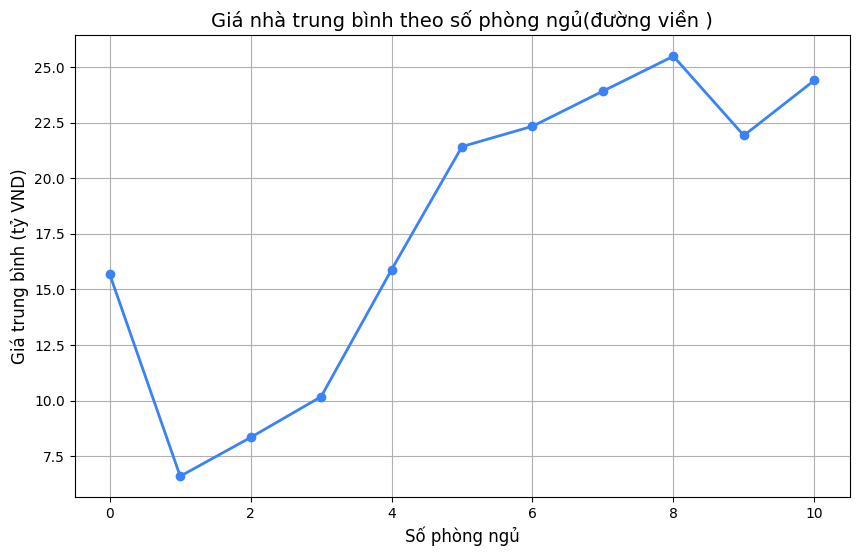

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Đọc dữ liệu từ file CSV
df = pd.read_csv('bds_clean_grouped.csv')

# Chuyển đổi giá từ VND sang tỷ VND để dễ đọc
df['Gia_ty_VND'] = df['Gia_VND'] / 1e9

# 1. Line Plot: Giá trung bình theo số phòng ngủ
plt.figure(figsize=(10, 6))
avg_price_by_bedrooms = df.groupby('Số phòng ngủ')['Gia_ty_VND'].mean().sort_index()
plt.plot(avg_price_by_bedrooms.index, avg_price_by_bedrooms.values, marker='o', color='#3B82F6', linewidth=2)
plt.title('Giá nhà trung bình theo số phòng ngủ(đường viền )', fontsize=14)
plt.xlabel('Số phòng ngủ', fontsize=12)
plt.ylabel('Giá trung bình (tỷ VND)', fontsize=12)
plt.grid(True)
plt.show()






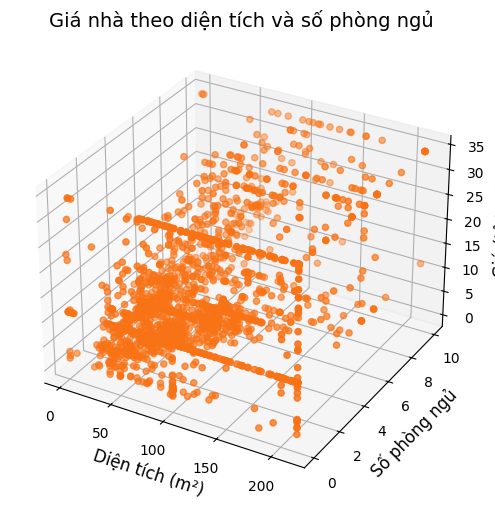

In [2]:


# 6. 3D Plot: Giá nhà theo diện tích và số phòng ngủ
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Diện tích (m²) đã làm sạch'], df['Số phòng ngủ'], df['Gia_ty_VND'], c='#F97316', marker='o')
ax.set_title('Giá nhà theo diện tích và số phòng ngủ', fontsize=14)
ax.set_xlabel('Diện tích (m²)', fontsize=12)
ax.set_ylabel('Số phòng ngủ', fontsize=12)
ax.set_zlabel('Giá (tỷ VND)', fontsize=12)
plt.show()

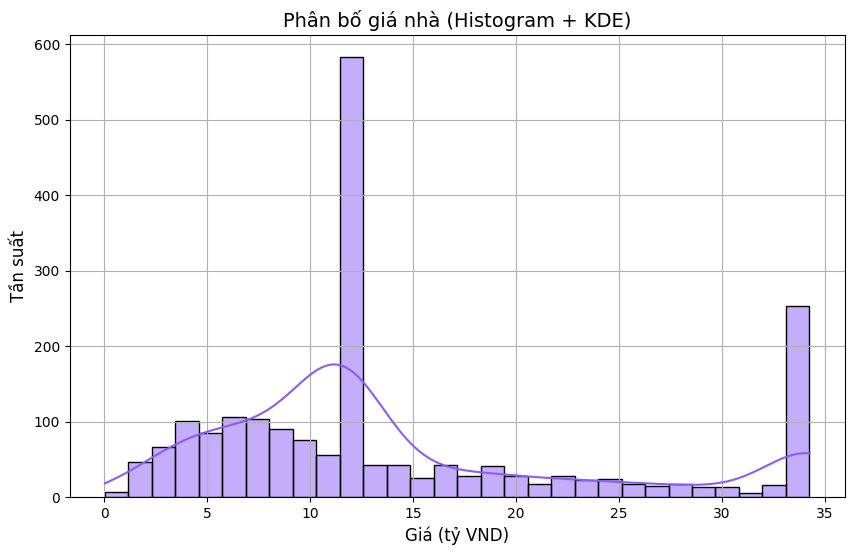

In [3]:


# 5. Histogram + KDE: Phân bố giá nhà
plt.figure(figsize=(10, 6))
sns.histplot(df['Gia_ty_VND'], kde=True, color='#8B5CF6', bins=30)
plt.title('Phân bố giá nhà (Histogram + KDE)', fontsize=14)
plt.xlabel('Giá (tỷ VND)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(True)
plt.show()

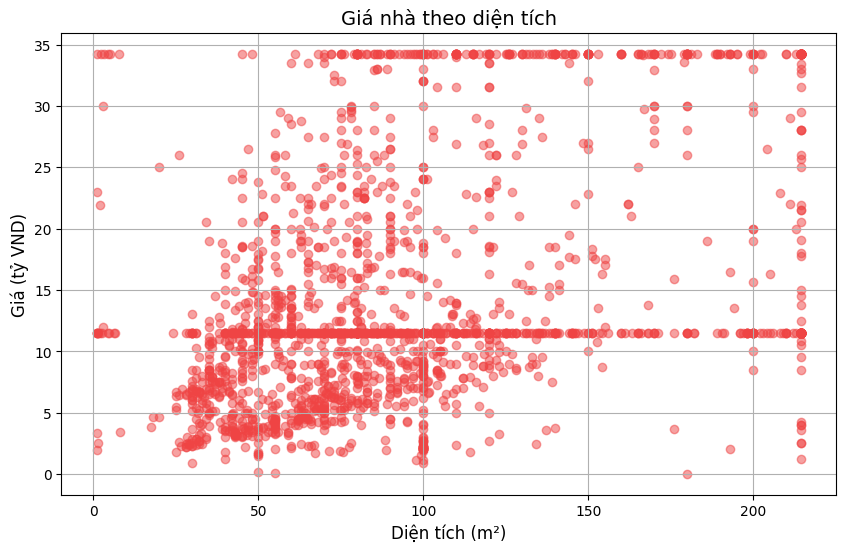

In [4]:
# 2. Scatter Plot: Giá nhà theo diện tích
plt.figure(figsize=(10, 6))
plt.scatter(df['Diện tích (m²) đã làm sạch'], df['Gia_ty_VND'], color='#EF4444', alpha=0.5)
plt.title('Giá nhà theo diện tích', fontsize=14)
plt.xlabel('Diện tích (m²)', fontsize=12)
plt.ylabel('Giá (tỷ VND)', fontsize=12)
plt.grid(True)
plt.show()

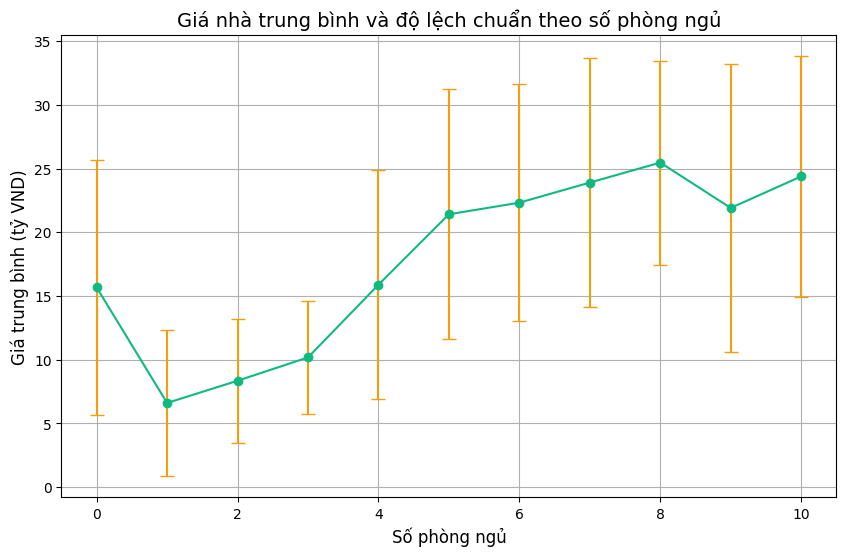

In [5]:
# 3. Error Bar Plot: Giá trung bình và độ lệch chuẩn theo số phòng ngủ
plt.figure(figsize=(10, 6))
price_stats = df.groupby('Số phòng ngủ')['Gia_ty_VND'].agg(['mean', 'std']).sort_index()
plt.errorbar(price_stats.index, price_stats['mean'], yerr=price_stats['std'], fmt='o-', color='#10B981', ecolor='#F59E0B', capsize=5)
plt.title('Giá nhà trung bình và độ lệch chuẩn theo số phòng ngủ', fontsize=14)
plt.xlabel('Số phòng ngủ', fontsize=12)
plt.ylabel('Giá trung bình (tỷ VND)', fontsize=12)
plt.grid(True)
plt.show()

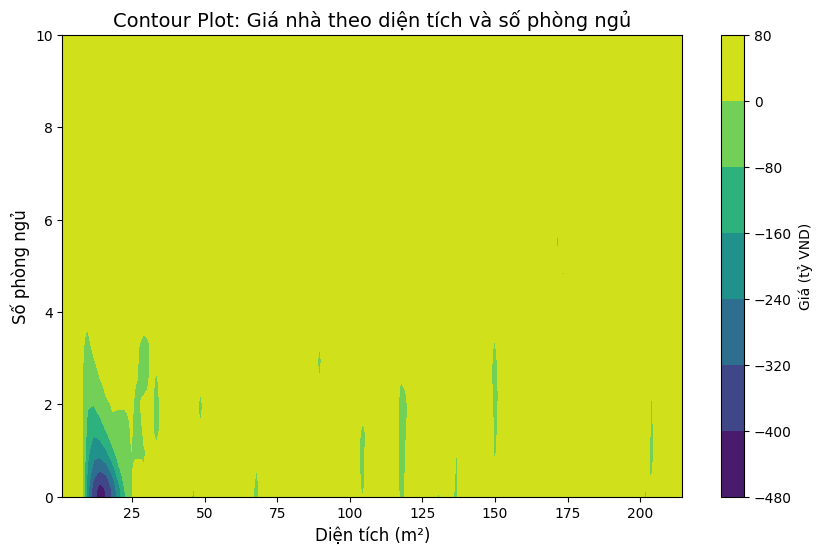

In [6]:
# 4. Contour Plot: Giá nhà theo diện tích và số phòng ngủ
# Lọc dữ liệu để tránh giá trị không hợp lệ
data = df[['Diện tích (m²) đã làm sạch', 'Số phòng ngủ', 'Gia_ty_VND']].dropna()
x = data['Diện tích (m²) đã làm sạch']
y = data['Số phòng ngủ']
z = data['Gia_ty_VND']

# Tạo lưới cho contour
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(10, 6))
contour = plt.contourf(xi, yi, zi, cmap='viridis')
plt.colorbar(contour, label='Giá (tỷ VND)')
plt.title('Contour Plot: Giá nhà theo diện tích và số phòng ngủ', fontsize=14)
plt.xlabel('Diện tích (m²)', fontsize=12)
plt.ylabel('Số phòng ngủ', fontsize=12)
plt.show()